In [1]:
## LeoZ_Notebook
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
## import plotly.graph_objects as go
from scipy.stats import linregress


In [2]:
# Import csv files
ax_csv = pd.read_csv("../Resources/ad_clean.csv")
ax_csv.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,4/23/2020,23.5,22.7,24.3,22.7 - 24.3,NaN,17
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,4/23/2020,32.7,30.2,35.2,30.2 - 35.2,NaN,17
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,4/23/2020,25.7,24.1,27.3,24.1 - 27.3,NaN,17
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,4/23/2020,24.8,23.3,26.2,23.3 - 26.2,NaN,17
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,4/23/2020,23.2,21.5,25.0,21.5 - 25.0,NaN,17


In [3]:
ax_csv.dtypes

Indicator               object
Group                   object
State                   object
Subgroup                object
Week                     int64
Week Label              object
Value                  float64
Low CI                 float64
High CI                float64
Confidence Interval     object
Quartile range          object
Weeknum                  int64
dtype: object

In [4]:
cal = ax_csv.loc[(ax_csv["State"]=="California")&(ax_csv["Subgroup"]=="California")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
cal.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
163,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,1,4/23/2020,37.4,34.2,40.6,34.2 - 40.6,36.8 - 41.4,17
373,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,2,5/7/2020,34.4,30.4,38.6,30.4 - 38.6,33.5 - 36.0,19
583,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,3,5/14/2020,38.8,35.1,42.6,35.1 - 42.6,35.0-44.3,20
793,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,4,5/21/2020,36.2,32.8,39.7,32.8 - 39.7,35.6-41.4,21
1003,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,5,5/28/2020,38.6,36.3,40.8,36.3 - 40.8,37.0-40.0,22


R Val is 0.5844221876162666


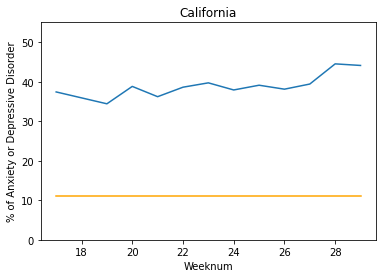

In [6]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = cal["Value"]
month = cal["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="red", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("California")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = cal['Weeknum']
y_values = cal['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

# plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_cal_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
tx = ax_csv.loc[(ax_csv["State"]=="Texas")&(ax_csv["Subgroup"]=="Texas")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
tx.head()


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
202,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Texas,Texas,1,4/23/2020,34.9,30.8,39.2,30.8 - 39.2,34.8 - 36.7,17
412,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Texas,Texas,2,5/7/2020,35.9,31.4,40.6,31.4 - 40.6,33.5 - 36.0,19
622,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Texas,Texas,3,5/14/2020,34.8,31.8,37.9,31.8 - 37.9,32.6-34.9,20
832,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Texas,Texas,4,5/21/2020,37.7,33.8,41.7,33.8 - 41.7,35.6-41.4,21
1042,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Texas,Texas,5,5/28/2020,36.9,33.7,40.2,33.7 - 40.2,34.3-36.9,22


R Val is 0.7694893432384619


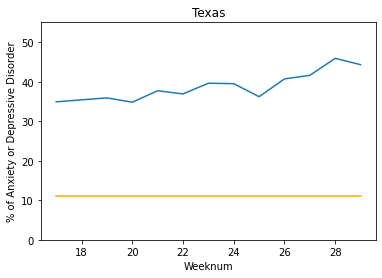

In [8]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = tx["Value"]
month = tx["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="blue", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Texas")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = tx['Weeknum']
y_values = tx['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_tx_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
ga = ax_csv.loc[(ax_csv["State"]=="Georgia")&(ax_csv["Subgroup"]=="Georgia")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
ga.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
169,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Georgia,Georgia,1,4/23/2020,36.2,31.8,40.7,31.8 - 40.7,34.8 - 36.7,17
379,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Georgia,Georgia,2,5/7/2020,34.3,28.2,40.8,28.2 - 40.8,33.5 - 36.0,19
589,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Georgia,Georgia,3,5/14/2020,33.6,29.1,38.3,29.1 - 38.3,32.6-34.9,20
799,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Georgia,Georgia,4,5/21/2020,37.5,33.3,41.8,33.3 - 41.8,35.6-41.4,21
1009,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Georgia,Georgia,5,5/28/2020,34.9,31.0,39.0,31.0 - 39.0,34.3-36.9,22


R Val is 0.5653225117107845


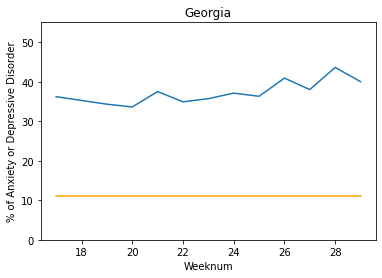

In [10]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = ga["Value"]
month = ga["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="orange", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Georgia")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = ga['Weeknum']
y_values = ga['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")


plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_ga_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
fla = ax_csv.loc[(ax_csv["State"]=="Florida")&(ax_csv["Subgroup"]=="Florida")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
fla.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
168,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Florida,Florida,1,4/23/2020,36.8,33.9,39.8,33.9 - 39.8,36.8 - 41.4,17
378,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Florida,Florida,2,5/7/2020,33.6,28.5,39.1,28.5 - 39.1,33.5 - 36.0,19
588,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Florida,Florida,3,5/14/2020,33.5,30.2,37.0,30.2 - 37.0,32.6-34.9,20
798,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Florida,Florida,4,5/21/2020,39.1,36.3,41.9,36.3 - 41.9,35.6-41.4,21
1008,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Florida,Florida,5,5/28/2020,40.0,36.6,43.4,36.6 - 43.4,37.0-40.0,22


R Val is 0.6086321377203777


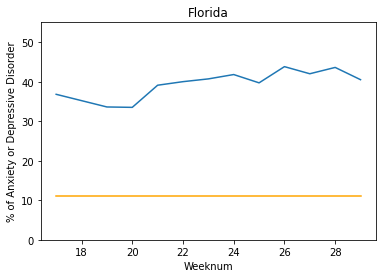

In [12]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = fla["Value"]
month = fla["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="green", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Florida")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = fla['Weeknum']
y_values = fla['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")

plt.ylim(0,ax_csv["Value"].max())

# plt.legend(handles=[anxiety, covid], loc="best")

# plt.grid()

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_fla_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [13]:
sd = ax_csv.loc[(ax_csv["State"]=="South Dakota")&(ax_csv["Subgroup"]=="South Dakota")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
sd.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
200,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,1,4/23/2020,25.6,20.5,31.1,20.5 - 31.1,25.6 - 33.3,17
410,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,2,5/7/2020,29.8,21.5,39.2,21.5 - 39.2,26.1 - 30.5,19
620,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,3,5/14/2020,27.8,21.1,35.2,21.1 - 35.2,23.8-29.7,20
830,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,4,5/21/2020,36.3,30.7,42.2,30.7 - 42.2,35.6-41.4,21
1040,Symptoms of Anxiety Disorder or Depressive Dis...,By State,South Dakota,South Dakota,5,5/28/2020,29.7,25.3,34.4,25.3 - 34.4,26.0-31.6,22


R Val is 0.49811433459038784


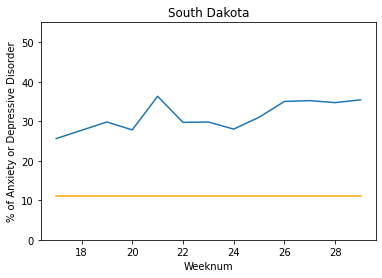

In [14]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = sd["Value"]
month = sd["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="yellow", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("South Dakota")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = sd['Weeknum']
y_values = sd['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")


plt.ylim(0,ax_csv["Value"].max())

plt.savefig('../output_data/leo_anx_sd_plot.png', dpi=300, bbox_inches='tight')

print(f"R Val is {rvalue**2}")


In [15]:
md = ax_csv.loc[(ax_csv["State"]=="Maryland")&(ax_csv["Subgroup"]=="Maryland")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
md.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
179,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Maryland,Maryland,1,4/23/2020,32.9,29.3,36.6,29.3 - 36.6,25.6 - 33.3,17
389,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Maryland,Maryland,2,5/7/2020,34.6,28.4,41.3,28.4 - 41.3,33.5 - 36.0,19
599,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Maryland,Maryland,3,5/14/2020,32.7,28.8,36.8,28.8 - 36.8,32.6-34.9,20
809,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Maryland,Maryland,4,5/21/2020,31.6,27.6,35.9,27.6 - 35.9,29.6-33.1,21
1019,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Maryland,Maryland,5,5/28/2020,30.8,27.5,34.2,27.5 - 34.2,26.0-31.6,22


R Val is 0.1797659685595673


(0.0, 55.0)

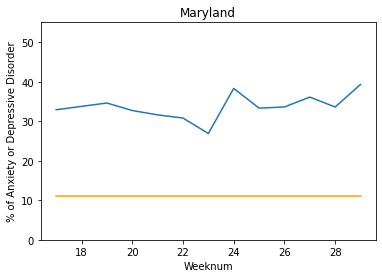

In [16]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = md["Value"]
month = md["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="purple", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("Maryland")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis% of Anxiety or Depressive Disorder
plt.ylim(0,ax_csv["Value"].max()) 

x_values = md['Weeknum']
y_values = md['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_md_plot.png', dpi=300, bbox_inches='tight')

plt.ylim(0,ax_csv["Value"].max())

In [17]:
us = ax_csv.loc[(ax_csv["State"]=="United States")&(ax_csv["Subgroup"]=="United States")&(ax_csv["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder")]
us.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
140,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,4/23/2020,35.9,35.0,36.8,35.0 - 36.8,NaN,17
350,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,2,5/7/2020,34.4,33.3,35.5,33.3 - 35.5,NaN,19
560,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,3,5/14/2020,33.9,33.1,34.7,33.1 - 34.7,NaN,20
770,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,4,5/21/2020,34.3,33.6,35.1,33.6 - 35.1,NaN,21
980,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,5,5/28/2020,35.5,34.8,36.1,34.8 - 36.1,NaN,22


R Val is 0.7372959294068047


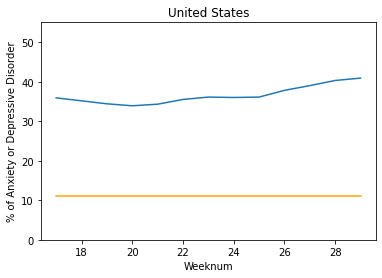

In [18]:
# Create the X and Y axis list

# Value = np.arange(0,100,10)
percentage = us["Value"]
month = us["Weeknum"]

# Plot the charts
anxiety = plt.plot(month, percentage, color="tab:blue", label="Symptoms of Anxiety Disorder or Depressive Disorder")
# covid, = plt.plot(percentage, month, color="purple", label="Covid")

# Add labels to X and Y axes and titles 
plt.title("United States")
plt.xlabel("Weeknum")
plt.ylabel("% of Anxiety or Depressive Disorder")

# Set the limits for the X and Y axes
# plt.xlim(0,52)

# Regression Analysis
plt.ylim(0,ax_csv["Value"].max()) 

x_values = us['Weeknum']
y_values = us['Value']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

#plt.annotate(line_eq, (20,50), fontsize = 15, color="red")

#plt.plot(x_values, regress_values, "r-")

plt.ylim(0,ax_csv["Value"].max())

plt.plot(x_values, np.full((12,),11.0), color="orange")
plt.ylim(0,ax_csv["Value"].max())

print(f"R Val is {rvalue**2}")

plt.savefig('../output_data/leo_anx_us_plot.png', dpi=300, bbox_inches='tight')

In [ ]:
# ui_csv['year'] = pd.DatetimeIndex(ui_csv['Reflecting Week Ended']).year
# ui_csv['month'] = pd.DatetimeIndex(ui_csv['Reflecting Week Ended']).month
# ui_csv
